### Import modules

In [3]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import numpy as  np

# Local imports
os.chdir('/home/HPC/cdroin/example_DA_study_runIII_PU/master_study/analysis/tune_scan/')
#sys.path.insert(1, os.path.join(sys.path[0], '..'))
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()



In [4]:
# Define study
STUDY_NAME = "oct_scan_22cm_145murad_high_target"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)


df

normalized amplitude in xy-plane  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy     i_oct_b1                                     
lhcb1 base_collider      6.000000e+10            145.0          62.310 60.315 -600.0                                 4.5   
                                                                              -550.0                                 4.5   
                                                                              -500.0                                 4.5   
                                                                              -450.0                                 4.5   
                                                                              -400.0                                 4.5   
...                                                                                                                  ...   
                                                                62.319 60.324  400.0                                 4.5   
                                                                               450.0                                 4.5   
                                                                               500.0                                 4.5   
                                                                               550.0                                 4.5   
                                                                               600.0                                 4.5   

                                                                                            qx  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy     i_oct_b1           
lhcb1 base_collider      6.000000e+10            145.0          62.310 60.315 -600.0    62.310   
                                                                              -550.0    62.310   
                                                                              -500.0    62.310   
                                                                              -450.0    62.310   
                                                                              -400.0    62.310   
...                                                                                        ...   
                                                                62.319 60.324  400.0    62.319   
                                                                               450.0    62.319   
                                                                               500.0    62.319   
                                                                               550.0    62.319   
                                                                               600.0    62.319   

                                                                                            qy  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy     i_oct_b1           
lhcb1 base_collider      6.000000e+10            145.0          62.310 60.315 -600.0    60.315   
                                                                              -550.0    60.315   
                                                                              -500.0    60.315   
                                                                              -450.0    60.315   
                                                                              -400.0    60.315   
...                                                                                        ...   
                                                                62.319 60.324  400.0    60.324   
                                                                               450.0    60.324   
                                                                               500.0    60.324   
                                                                               550.0    60.324   
                        

In [5]:
# Reshape for plotting
df_to_plot = df.pivot(index="qx", columns="i_oct_b1", values="normalized amplitude in xy-plane")

l_oct = np.linspace(-600,600,25)

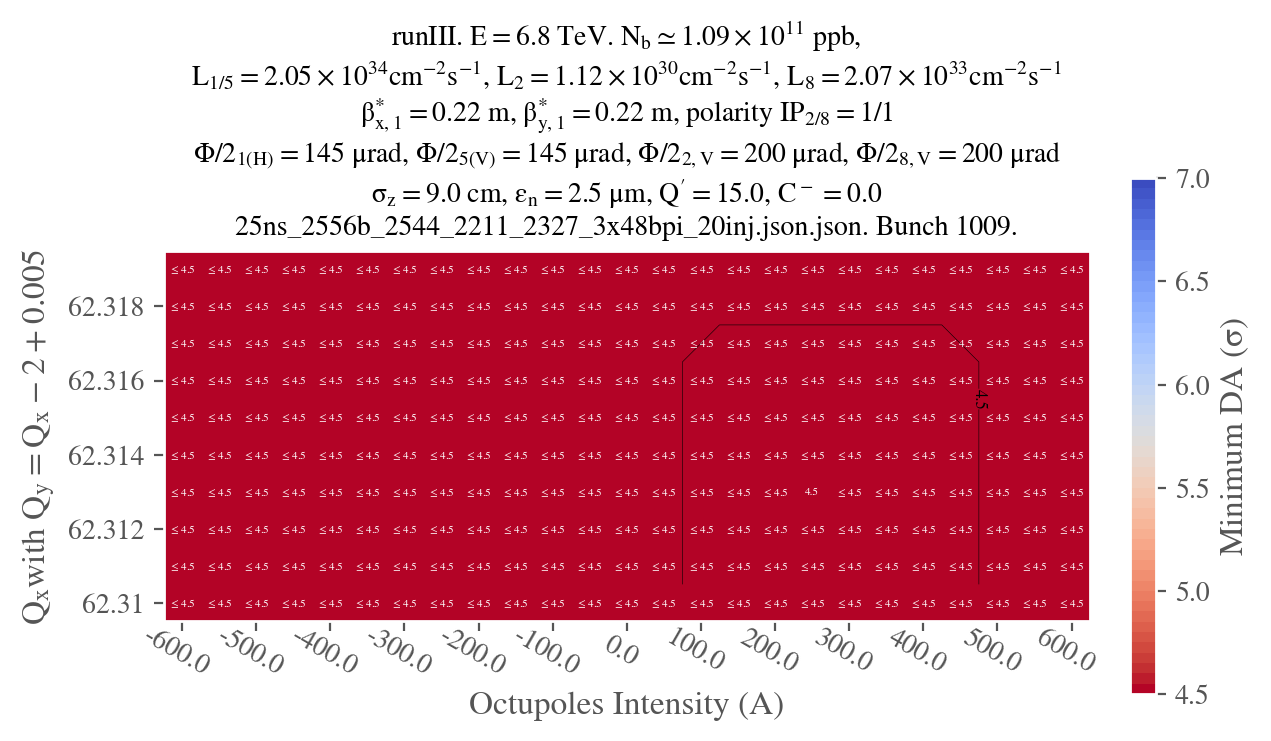

In [6]:
df_to_plot.columns = [str(oct) for oct in l_oct]

# replace nan in df by 10
# df_to_plot = df_to_plot.fillna(10)


# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

xlabel = "Octupoles Intensity (A)"
ylabel = r"$Q_x$" + "with " + r"$Q_y = Q_x -2 + 0.005$"
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    betx=0.22,
    bety=0.22,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel=xlabel,
    ylabel=ylabel,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=False,
    Nb = True,
    green_contour = 5.5,
    extended_diagonal=False,
    vmin = 4.5,
    vmax = 7,
    #title="opt_collapse_1100_1500_oct_scan",
)

